In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from functions import *

# SIR Model on G(n,p) Network

Code adapted from first example found here: https://arxiv.org/pdf/2001.02436.pdf.

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### TODO:
**Emma & Sam**
* Get more appropriate graph for a prison
* Set parameters to be COVID specific --- Check paper she posted

**Me & Marcel**
* Figure out how to incorporate birth rate into prison
* Figure out how to incorporate inmate releases
* Use SIR model

### Assumptions:
- Added nodes are susceptible (not I or R)

## Set Parameters

In [10]:
# Set G(n,p) model-specific parameters
N = 1000 # number of individuals
kave = 10 # expected number of contacts per person

In [11]:
# Set simulation-specific parameters
birth_number = 0
release_number = 200
initial_infected = [0] # initial nodes that are infected

tau = 1.0 # transmission rate
gamma = 1.0 # recovery rate
max_time = 5

## Generate graph

In [12]:
G = nx.fast_gnp_random_graph(N, kave/(N-1))

# Run Simulation

In [13]:
infected_list = initial_infected
recovered_list = []
data_list = []

# Loop over time
for i in range(max_time):
    # Run simulation
    data = EoN.fast_SIR(G, tau, gamma, initial_infecteds=infected_list, initial_recovereds=recovered_list,\
                        tmin=i, tmax=i+1, return_full_data=True)
    data_list.append(data)
    
    # Update infected and recovered nodelists
    infected_list, recovered_list = get_infected(data, i+1), get_recovered(data, i+1)
    
    # Add and remove nodes
    G, infected_list, recovered_list = recalibrate_graph(G, infected_list, recovered_list, birth_number, release_number)

# Process Data

In [14]:
times_l = []
susceptible_ll = []
infected_ll = []
recovered_ll = []

for data in data_list:
    times, dict_of_states = data.summary()
    times_l.append(np.delete(times, 0))
    susceptible_ll.append(np.delete(dict_of_states['S'], 0))
    infected_ll.append(np.delete(dict_of_states['I'], 0))
    recovered_ll.append(np.delete(dict_of_states['R'], 0))

In [16]:
t, S, I, R = aggregate_quantity(times_l), aggregate_quantity(susceptible_ll),\
            aggregate_quantity(infected_ll), aggregate_quantity(recovered_ll)

In [17]:
t.shape, I.shape, R.shape

((1616,), (1616,), (1616,))

## Plot Results

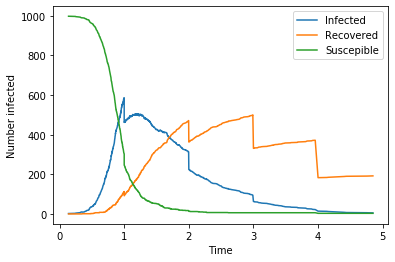

In [18]:
#plt.plot(times, S1, label = 'Susceptible')
plt.plot(t, I, label = 'Infected')
plt.plot(t, R, label = 'Recovered')
plt.plot(t, S, label = 'Suscepible')
# plt.plot(t_deaths, deaths, label = 'Deaths')

plt.xlabel('Time')
plt.ylabel('Number infected')
plt.legend()
plt.show()

In [ ]:
tTest, Stest, Itest, Rtest = EoN.fast_SIR(G, tau, gamma, initial_infecteds=[0], tmin=1, tmax=5)

In [ ]:
plt.plot(tTest, Itest, label = 'Infected')
plt.plot(tTest, Rtest, label = 'Recovered')
plt.plot(tTest, Stest, label = 'Suscepible')